In [1]:
# https://www.kaggle.com/niyipop/2-layer-neural-network-from-scratch-using-numpy
import numpy as np
import pandas as pd
#import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from sklearn.model_selection import train_test_split
from tensorflow import keras

# Dasaset

In [2]:
dataset_path = keras.utils.get_file("iris.data", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
dataset_path

'/home/fred/.keras/datasets/iris.data'

In [4]:
dataframe = pd.read_csv(dataset_path)
dataframe.columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']
dataset = dataframe.values
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0
...,...,...,...,...,...
115,5.5,2.6,4.4,1.2,1
116,5.7,3.0,4.2,1.2,1
117,4.4,2.9,1.4,0.2,0
118,4.8,3.0,1.4,0.1,0


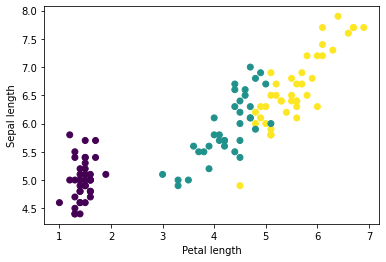

In [5]:
plt.scatter(dataframe['petal_length'],
            dataframe['sepal_length'],
            c=dataframe['species'],
            cmap='viridis')

plt.xlabel("Petal length")
plt.ylabel("Sepal length")
plt.show()


In [6]:
# split into input (X) and output (Y) variables
X = pd.DataFrame(dataset[:,0:4]).astype(float)
y = pd.DataFrame(dataset[:,4])
y = y.astype('int')

In [8]:
X.shape

(120, 4)

In [10]:
from sklearn.preprocessing import OneHotEncoder
# One Hot encode the class labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)
y

array([[0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0

In [11]:
#Split data to training and validation data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

# Activation Function

In [17]:
#sigmoid and its derivative
def sigmoid(x, derivative = False):
    if derivative:
        return sigmoid(x)*(1 - sigmoid(x))
    
    return 1/(1+np.exp(-x))  

In [12]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=0)

In [32]:
tmp = [1, 2, 3]
tmp = softmax(tmp)
tmp


array([0.09003057, 0.24472847, 0.66524096])

In [39]:
input_dims = 4
hidden_dims = 32
output_dims = 3

In [40]:
#Initialization Weights
w0 = 2 * np.random.random((input_dims, hidden_dims)) -1
w1 = 2 * np.random.random((hidden_dims, output_dims)) -1

In [41]:
#learning rate
learning_rate = 0.1

#Errors - for graph later
errors = []
# Acc - for graph later
acc = []

epochs = 100
#Train
for i in range(epochs):

    #Feed forward
    layer0 = X
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))

    # Error
    layer2_error = y - layer2
    
    # Back propagation

    layer2_delta = layer2_error * sigmoid(layer2, derivative=True)
    
    layer1_error = layer2_delta.dot(w1.T)
    layer1_delta = layer1_error * sigmoid(layer1, derivative=True)
    
    #  Gradient descent
    w1 += learning_rate * layer1.T.dot(layer2_delta)
    w0 += learning_rate * layer0.T.dot(layer1_delta)
    
    error = np.mean(np.abs(layer2_error))
    errors.append(error)
    accuracy = (1 - error) * 100
    acc.append(accuracy)
    
    print('Error: {:.10f} Acc: {}'.format(error, accuracy))


Error: 0.5326515962 Acc: 46.734840378245416
Error: 0.4623470880 Acc: 53.76529119806752
Error: 0.4594125405 Acc: 54.058745952571606
Error: 0.4023448839 Acc: 59.76551161336003
Error: 0.4322614500 Acc: 56.77385500487673
Error: 0.2940478742 Acc: 70.59521257851304
Error: 0.4237856563 Acc: 57.621434374912695
Error: 0.2914890025 Acc: 70.8510997464304
Error: 0.3117457236 Acc: 68.82542764327599
Error: 0.3181244991 Acc: 68.18755009288813
Error: 0.4279212904 Acc: 57.20787095707368
Error: 0.2994267085 Acc: 70.05732915250043
Error: 0.3277304301 Acc: 67.22695698983412
Error: 0.4005069493 Acc: 59.94930506788625
Error: 0.2445816786 Acc: 75.54183213720951
Error: 0.4069061727 Acc: 59.30938272531301
Error: 0.2537577687 Acc: 74.62422313201048
Error: 0.2667112493 Acc: 73.32887507391173
Error: 0.2722109226 Acc: 72.77890773953942
Error: 0.2614424389 Acc: 73.85575611498265
Error: 0.2911865909 Acc: 70.88134090622695
Error: 0.3070451825 Acc: 69.29548175026696
Error: 0.2855660134 Acc: 71.44339866014067
Error: 0.

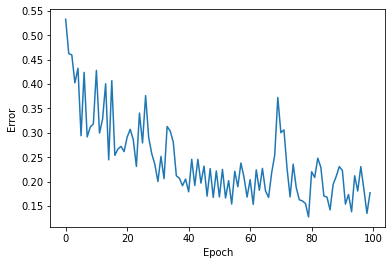

In [42]:
#Plot the error chart
plt.plot(errors)
plt.xlabel('Epoch')
plt.ylabel('Error')
plt.show()
    

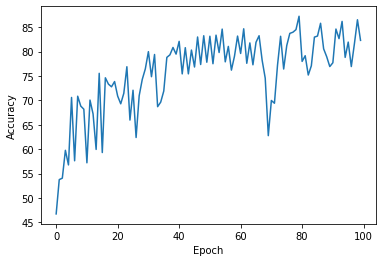

Training Accuracy 82.29%


In [43]:
#Plot the accuracy chart
plt.plot(acc)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()
print("Training Accuracy " + str(round(accuracy,2)) + "%")